# Lasso Regression vs Ridge Regression - Comparing R2 and Lambdas

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


In [3]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.450062579301185

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.44363376712897096

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


In [4]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.44553225151184195
0.4380466345914476


## Lasso Regression

In [23]:
lams = np.arange(0.25, 1, 0.05)
# lams = np.arange(1, 10, 1)

r2s = []

for lam in lams:
    lassBig2 = linear_model.Lasso(alpha=lam)
    lassBig2.fit(X_train2, Y_train)
    r2s.append(lassBig2.score(X_train2, Y_train))

print(lams)
print('\n-----\n')
print(r2s)

[0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85 0.9
 0.95]

-----

[0.5073444290020301, 0.4781445089581402, 0.44363376712897096, 0.4038148555303922, 0.3586868179263748, 0.3082496073309635, 0.25250323788059603, 0.1914467410568793, 0.12508173342426998, 0.05340781434063379, 0.026834134834571755, 0.026834134749037727, 0.026834134657985894, 0.026834134561415365, 0.026834134459326586]


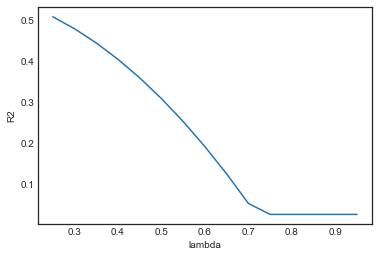

In [24]:
plt.plot(lams, r2s)
plt.xlabel('lambda')
plt.ylabel('R2')
plt.show()

## Ridge Regression 

In [29]:
lams = np.arange(1, 10, 1)
# lams = np.arange(0.25, 1, 0.05)

r2s_ridge = []

for lam in lams:
    ridgeregrBig = linear_model.Ridge(alpha=lam, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    r2s_ridge.append(ridgeregrBig.score(X_train2, Y_train))

print(lams)
print('\n-----\n')
print(r2s_ridge)

[1 2 3 4 5 6 7 8 9]

-----

[0.5739686014515516, 0.5739638611811129, 0.573960030139923, 0.5739570041443245, 0.573954555354611, 0.5739525094004445, 0.5739507454493842, 0.5739491802023644, 0.573947755295727]


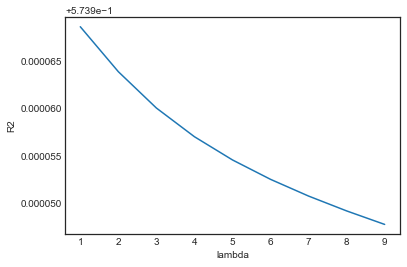

In [30]:
plt.plot(lams, r2s_ridge)
plt.xlabel('lambda')
plt.ylabel('R2')
plt.show()